In [1]:
# Custom helper functions
import numpy as np
from Helpers import load_data, denormalize_all_windows

# Keras for building Neural Network
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test), (train_ori, test_ori) = load_data('sp500.csv', 50)

In [3]:
test_ori = test_ori.astype('float')

In [4]:
x_train

array([[[  0.00000000e+00],
        [ -7.09077301e-03],
        [  1.01860270e-02],
        ..., 
        [  1.81770691e-02],
        [  7.44478218e-03],
        [  2.99511298e-02]],

       [[  0.00000000e+00],
        [  9.55678238e-04],
        [  2.80719675e-02],
        ..., 
        [ -3.06395086e-02],
        [ -7.11069039e-03],
        [  4.01965513e-02]],

       [[  0.00000000e+00],
        [  1.08422006e-03],
        [  1.11037008e-03],
        ..., 
        [ -2.28912650e-02],
        [ -2.10899946e-02],
        [ -1.93587435e-02]],

       ..., 
       [[  0.00000000e+00],
        [  2.58427072e-02],
        [  2.99987823e-02],
        ..., 
        [  4.75666201e-02],
        [  5.33104950e-02],
        [  4.70249646e-02]],

       [[  0.00000000e+00],
        [  9.40532095e-03],
        [  3.10753607e-03],
        ..., 
        [  3.02569785e-02],
        [  3.56721867e-02],
        [  3.68674362e-02]],

       [[  0.00000000e+00],
        [  6.34998576e-05],
        [  

In [5]:
y_train

array([ 0.03199442,  0.04447582, -0.02595159, ...,  0.01752109,
        0.03541473,  0.05775602])

In [7]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    units=50,
    input_shape=(None,1),   
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    units=100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

In [8]:
history = model.fit(x_train,
                    y_train,
                    batch_size=512,
                    nb_epoch=10,
                    validation_split=0.2)

/home/richard/deep_learn_p3/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2308 samples, validate on 577 samples
Epoch 1/10
2308/2308 [==============================] - 1s - loss: 0.0035 - val_loss: 0.0023
Epoch 2/10
2308/2308 [==============================] - 0s - loss: 0.0013 - val_loss: 8.3311e-04
Epoch 3/10
2308/2308 [==============================] - 0s - loss: 8.2620e-04 - val_loss: 7.4228e-04
Epoch 4/10
2308/2308 [==============================] - 0s - loss: 8.2194e-04 - val_loss: 5.9202e-04
Epoch 5/10
2308/2308 [==============================] - 0s - loss: 6.5387e-04 - val_loss: 5.6217e-04
Epoch 6/10
2308/2308 [==============================] - 0s - loss: 6.3080e-04 - val_loss: 7.0475e-04
Epoch 7/10
2308/2308 [==============================] - 0s - loss: 7.4717e-04 - val_loss: 4.9306e-04
Epoch 8/10
2308/2308 [==============================] - 0s - loss: 6.2839e-04 - val_loss: 4.4161e-04
Epoch 9/10
2308/2308 [==============================] - 0s - loss: 5.1247e-04 - val_loss: 5.3779e-04
Epoch 10/10
2308/2308 [==============================] -

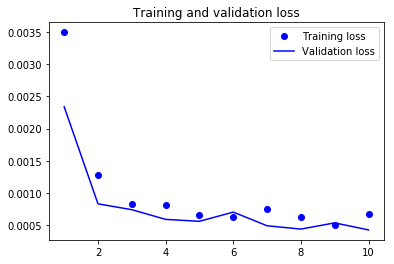

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
model.evaluate(x_test, y_test)

1236/1236 [==============================] - 0s     


0.00024159239250171966

In [11]:
y_pred_denormalized = denormalize_all_windows(
    np.concatenate((x_test.reshape((x_test.shape[0], x_test.shape[1])), model.predict(x_test)), axis=1),
    test_ori
)[:, -1]

In [12]:
y_test_denormalized = test_ori[:, -1]

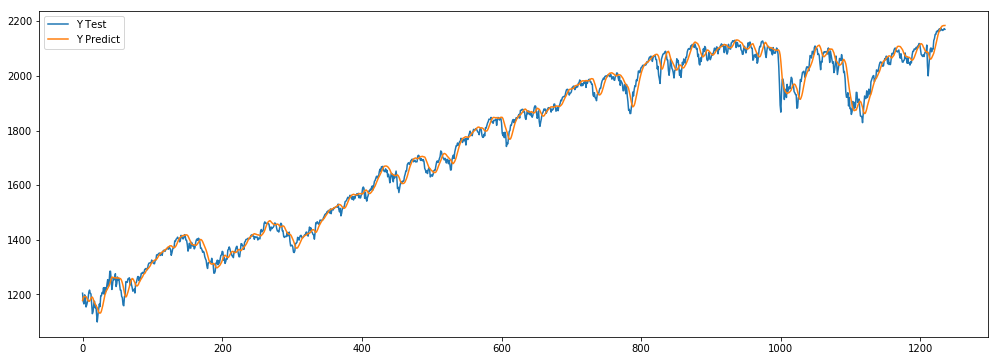

In [20]:
timestep = range(y_test.shape[-1])

plt.figure(figsize=(17, 6))
plt.plot(timestep, y_test_denormalized, label='Y Test')
plt.plot(timestep, y_pred_denormalized, label='Y Predict')
plt.legend()

In [14]:
import plotly
from plotly import tools
plotly.tools.set_credentials_file(username='ng-kode', api_key='tXdog386jStP4wPZ1JO1')
import plotly.plotly as py
import plotly.graph_objs as go

In [16]:
timestep = np.arange(y_test.shape[-1])

trace1 = go.Scatter(
    x = timestep,
    y = y_test_denormalized,
    name='Y Test'
)

trace2 = go.Scatter(
    x = timestep,
    y = y_pred_denormalized,
    name='Y Predict'
)

data = [trace1, trace2]

py.iplot(data)